# Project New York
## Recommender Simulation

## Business Problem

Being New York City one of the largest cities in the United States and in the world, known as a great land of opportunities, makes it a perfect place for a venue idea. Even due to its large populated boroughs such as Manhattan that could create a positive impact on sales, costs can be very high especially around downtown and its surrounding areas. The purpose of this project is to analyze the 5 different boroughs that compound New York City, its clusters, the number of neighborhoods per cluster, number of venues per cluster. Bringing to topic multiculturalism, ethnicity plays a vital role into selecting which type of venue will be a good fit. For example, Downtown Manhattan is best known for its italian restaurants and pizza places, on the other hand, we have Chinatown and we sure know what type of food is being served. 

New York City Boroughs:

1. Manhattan
2. Bronx
3. Brooklyn
4. Queens
5. Staten Island

## Data Overview

As mentioned before, the main purpose of this project is to analyze neighborhoods that compound all 5 boroughs from the city of New York and conclude through a series of analyses which areas or area and which venue category or categories will best fit in New York City.

The data used on this project is based alone on New York City. Through Foursquare, data such as venues, venues categories and coordinates will be used alongside neighborhoods latitudes and longitudes coordinates to create a merged dataset that will allow the audience to comprehend throughout geospatial data the geography of New York City, population density, and number of local venues in each neighborhood and borough. Machine learning clustering analyses allows to create data visualization of the city neighborhoods and venues dataset and to conclude which venues could best fit an area based on venues frequency and population.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import folium 
import lxml

print('Libraries imported.')

Libraries imported.


In [2]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [3]:
neighborhoods_data = newyork_data['features']

In [4]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
newyork_n = pd.DataFrame(columns=column_names)

In [5]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    newyork_n = newyork_n.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [6]:
newyork_n.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [7]:
newyork_n.groupby(['Borough']).count().drop(columns=['Latitude','Longitude']).reset_index()

Borough  Neighborhood
0          Bronx            52
1       Brooklyn            70
2      Manhattan            40
3         Queens            81
4  Staten Island            63

In [8]:
print(newyork_n.shape[0])
print(len(newyork_n['Borough'].unique()))

306
5


In [9]:
geolocator = Nominatim(user_agent = 'foursquare_agent')
location = geolocator.geocode('New York City, New York')
latitude = location.latitude
longitude = location.longitude
print('Geographical Coordinates of New York City: {}, {}'.format(location.latitude, location.longitude))

Geographical Coordinates of New York City: 40.7127281, -74.0060152


In [10]:
borough_color = {'Bronx':'red', 'Manhattan':'blue', 'Brooklyn':'black', 'Queens':'yellow', 'Staten Island':'purple'}

In [11]:
ny_map = folium.Map(location =[latitude, longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip (newyork_n['Latitude'],newyork_n['Longitude'],
                                            newyork_n['Borough'],newyork_n['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color = borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.7).add_to(ny_map)

ny_map

In [12]:
print(newyork_n['Borough'].unique())

['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']


In [13]:
CLIENT_ID = '3FBPDHHS253YALJVYVEBK4P4HYTTKIBNWC4ZEJDMN1F2NZJ4' 
CLIENT_SECRET = 'ROOGQGRZZQMZ1PB5K5BV4HBV2A2YUZRKVLF4RMBS13MPLGJL' 
VERSION = '20190530' 

In [14]:
LIMIT = 2000
radius = 10000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=3FBPDHHS253YALJVYVEBK4P4HYTTKIBNWC4ZEJDMN1F2NZJ4&client_secret=ROOGQGRZZQMZ1PB5K5BV4HBV2A2YUZRKVLF4RMBS13MPLGJL&ll=40.7127281,-74.0060152&v=20190530&radius=10000&limit=2000'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc993f7e02006393a07d183'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'New York',
  'headerFullLocation': 'New York',
  'headerLocationGranularity': 'city',
  'totalResults': 236,
  'suggestedBounds': {'ne': {'lat': 40.80272819000009,
    'lng': -73.8875016126839},
   'sw': {'lat': 40.62272800999991, 'lng': -74.12452878731608}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5d5f24ec09484500079aee00',
       'name': 'Los Tacos No. 1',
       'location': {'address': '136 Church St',
        'lat': 40.714267,
        'lng': -74.008756,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40

In [16]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
import json 
from pandas.io.json import json_normalize 

venues = results['response']['groups'][0]['items']  
newyork_nearby_venues = pd.json_normalize(venues) 


filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
newyork_nearby_venues = newyork_nearby_venues.loc[:, filtered_columns]


newyork_nearby_venues['venue.categories'] = newyork_nearby_venues.apply(get_category_type, axis=1)


newyork_nearby_venues.columns = [col.split(".")[-1] for col in newyork_nearby_venues.columns]

newyork_nearby_venues.head(10)

name     categories        lat        lng
0              Los Tacos No. 1     Taco Place  40.714267 -74.008756
1           Aire Ancient Baths            Spa  40.718141 -74.004941
2     9/11 Memorial North Pool  Memorial Site  40.712077 -74.013187
3       One World Trade Center       Building  40.713069 -74.013133
4                    Crown Shy     Restaurant  40.706187 -74.007490
5                   sweetgreen    Salad Place  40.705626 -74.008282
6        The Rooftop @ Pier 17    Music Venue  40.705463 -74.001598
7  Battery Park City Esplanade           Park  40.711622 -74.017907
8  Pier 25 - Hudson River Park           Park  40.720193 -74.012950
9   Nelson A. Rockefeller Park           Park  40.717095 -74.016716

In [18]:
newyork_nearby_venues.shape

(100, 4)

In [19]:
print('{} venues were returned by Foursquare'.format(newyork_nearby_venues.shape[0]))

100 venues were returned by Foursquare


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
       
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)       

In [21]:
ny_venues = getNearbyVenues(names=newyork_n['Neighborhood'],
                                   latitudes=newyork_n['Latitude'],
                                   longitudes=newyork_n['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [22]:
ny_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2         Walgreens       40.896528       -73.844700        Pharmacy  
3  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
4           Dunkin'       40.890459       -73.849089      Donut Shop

In [23]:
print('There are {} neighborhoods.'.format(len(ny_venues['Neighborhood'].unique())))
print('There are {} uniques categories.'.format(len(ny_venues['Venue Category'].unique())))

There are 302 neighborhoods.
There are 428 uniques categories.


In [24]:
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")


ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 


fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0                  0               0                  0   
1            0                  0               0                  0   
2            0                  0               0                  0   
3            0                  0               0                  0   
4            0                  0               0                  0   

   African Restaurant  Airport Terminal  American Restaurant  Antique Shop  \
0                   0                 0                    0             0   
1                   0                 0                    0             0   
2                   0                 0                    0             0   
3                   0                 0                    0             0   
4                   0                 0                    0             0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Garage  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0                0          0           0           0       0   
1            0                0          0           0           0       0   
2            0                0          0           0           0       0   
3            0                0          0           0           0       0   
4            0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Bath House  \
0     0    0               0                 0                 0           0   
1     0    0               0                 0                 0           0   
2     0    0               0                 0                 0           0   
3     0    0               0                 0                 0           0   
4     0    0               0                 0                 0           0   

   Beach  Beach Bar  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0      0          0         0            0           0              0   
1      0          0         0            0           0              0   
2      0          0         0            0           0              0   
3      0          0         0            0           0              0   
4      0          0         0            0           0              0   

   Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  Board Shop  \
0                         0          0           0       0           0   
1                         0          0           0       0           0   
2                         0          0           0       0           0   
3                         0          0           0 

In [25]:
ny_venues_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()
ny_venues_grouped.head()

Neighborhood  Yoga Studio  Accessories Store  Adult Boutique  \
0       Allerton          0.0                0.0             0.0   
1       Annadale          0.0                0.0             0.0   
2  Arden Heights          0.0                0.0             0.0   
3      Arlington          0.0                0.0             0.0   
4       Arrochar          0.0                0.0             0.0   

   Afghan Restaurant  African Restaurant  Airport Terminal  \
0                0.0                 0.0               0.0   
1                0.0                 0.0               0.0   
2                0.0                 0.0               0.0   
3                0.0                 0.0               0.0   
4                0.0                 0.0               0.0   

   American Restaurant  Antique Shop  Arcade  Arepa Restaurant  \
0             0.000000           0.0     0.0               0.0   
1             0.181818           0.0     0.0               0.0   
2             0.000000           0.0     0.0               0.0   
3             0.000000           0.0     0.0               0.0   
4             0.000000           0.0     0.0               0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                     0.0          0.0         0.0                  0.0   
1                     0.0          0.0         0.0                  0.0   
2                     0.0          0.0         0.0                  0.0   
3                     0.0          0.0         0.0                  0.0   
4                     0.0          0.0         0.0                  0.0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  Auditorium  \
0                   0.0               0.0            0.000000         0.0   
1                   0.0               0.0            0.000000         0.0   
2                   0.0               0.0            0.000000         0.0   
3                   0.0               0.0            0.000000         0.0   
4                   0.0               0.0            0.047619         0.0   

   Australian Restaurant  Austrian Restaurant  Auto Garage  Automotive Shop  \
0                    0.0                  0.0          0.0              0.0   
1                    0.0                  0.0          0.0              0.0   
2                    0.0                  0.0          0.0              0.0   
3                    0.0                  0.0          0.0              0.0   
4                    0.0                  0.0          0.0              0.0   

   BBQ Joint  Baby Store  Bagel Shop    Bakery  Bank  Bar  Baseball Field  \
0        0.0         0.0    0.000000  0.033333   0.0  0.0             0.0   
1        0.0         0.0    0.000000  0.000000   0.0  0.0             0.0   
2        0.0         0.0    0.000000  0.000000   0.0  0.0             0.0   
3        0.0         0.0    0.000000  0.000000   0.0  0.0             0.0   
4        0.0         0.0    0.047619  0.000000   0.0  0.0             0.0   

   Baseball Stadium  Basketball Court  Bath House  Beach  Beach Bar  Beer Bar  \
0               0.0               0.0         0.0    0.0        0.0       0.0   
1               0.0               0.0         0.0    0.0        0.0       0.0   
2               0.0               0.0         0.0    0.0        0.0       0.0   
3               0.0               0.0         0.0    0.0        0.0       0.0   
4               0.0               0.0         0.0    0.0        0.0       0.0   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0          0.0         0.0            0.0                       0.0   
1          0.0         0.0            0.0                       0.0   
2          0.0         0.0            0.0                       0.0   
3          0.0         0.0            0.0                       0.0   
4          0.0         0.0            0.0                       0.0   

   Bike Shop  Bike Trail  Bistro  Board Shop  Boat or Ferry

In [44]:
ny_venues_grouped_mexican = ny_venues_grouped[['Neighborhood','Mexican Restaurant']]
ny_venues_grouped_mexican.head()

Neighborhood  Mexican Restaurant
0       Allerton                 0.0
1       Annadale                 0.0
2  Arden Heights                 0.0
3      Arlington                 0.0
4       Arrochar                 0.0

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']


columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


ny_venues_sorted = pd.DataFrame(columns=columns)
ny_venues_sorted['Neighborhood'] = ny_venues_grouped['Neighborhood']

for ind in np.arange(ny_venues_grouped.shape[0]):
    ny_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_venues_grouped.iloc[ind, :], num_top_venues)

ny_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place         Deli / Bodega   
1       Annadale   American Restaurant           Pizza Place   
2  Arden Heights         Deli / Bodega              Pharmacy   
3      Arlington         Grocery Store         Deli / Bodega   
4       Arrochar              Bus Stop    Italian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                   Spa           Supermarket    Chinese Restaurant  
1          Dance Studio         Train Station         Deli / Bodega  
2           Coffee Shop              Bus Stop           Pizza Place  
3           Coffee Shop              Bus Stop          Home Service  
4         Deli / Bodega           Pizza Place              Pharmacy

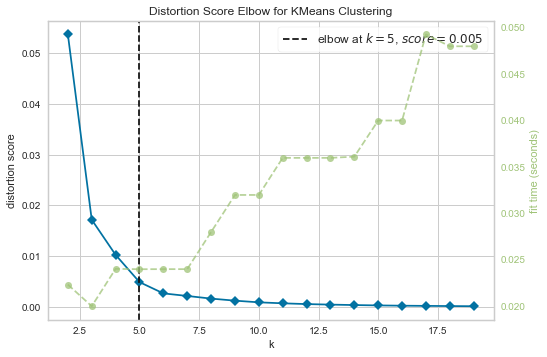

In [47]:
ny_grouped_cluster = ny_venues_grouped_mexican.drop('Neighborhood',1)
X = ny_grouped_cluster
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X)
visualizer.show()

In [48]:
kclusters = 5
kmeans = KMeans(n_clusters = kclusters, random_state=4).fit(ny_grouped_cluster)
kmeans.labels_[:21]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 3, 0, 4, 0, 0, 0, 1])

In [49]:
ny_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ny_merged = newyork_n
ny_merged = ny_merged.join(ny_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
ny_merged.head()

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201               0   
1   Bronx   Co-op City  40.874294 -73.829939               0   
2   Bronx  Eastchester  40.887556 -73.827806               0   
3   Bronx    Fieldston  40.895437 -73.905643               0   
4   Bronx    Riverdale  40.890834 -73.912585               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0              Pharmacy        Sandwich Place            Donut Shop   
1           Bus Station                   Bar            Restaurant   
2           Bus Station  Caribbean Restaurant         Deli / Bodega   
3  Medical Supply Store                 River                 Plaza   
4                  Park            Playground          Home Service   

  4th Most Common Venue 5th Most Common Venue  
0         Deli / Bodega           Gas Station  
1        Baseball Field    Chinese Restaurant  
2                 Diner         Bowling Alley  
3     Fish & Chips Shop           Event Space  
4                  Bank                 Plaza

In [50]:
import matplotlib.cm as cm
import matplotlib.colors as colors
ny_clusters = folium.Map(location = [latitude, longitude], zoom_start=10)


x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster, borough in zip(ny_merged['Latitude'], ny_merged['Longitude'], ny_merged['Neighborhood'], ny_merged['Cluster Labels'], ny_merged['Borough']):
    label = folium.Popup(str(borough) + " " + str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(ny_clusters)
    
ny_clusters

In [51]:
ny_merged.loc[ny_merged['Cluster Labels'] == 0, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

Neighborhood            1st Most Common Venue  \
0                    Wakefield                         Pharmacy   
1                   Co-op City                      Bus Station   
2                  Eastchester                      Bus Station   
3                    Fieldston             Medical Supply Store   
4                    Riverdale                             Park   
6                  Marble Hill                   Discount Store   
7                     Woodlawn                    Deli / Bodega   
9               Williamsbridge                              Bar   
11              Pelham Parkway                      Bus Station   
12                 City Island           Thrift / Vintage Store   
14          University Heights                      Pizza Place   
15              Morris Heights                Recreation Center   
16                     Fordham                Mobile Phone Shop   
17                East Tremont                      Pizza Place   
18                  West Farms                      Bus Station   
19                High  Bridge                      Bus Station   
21                  Mott Haven               Chinese Restaurant   
22                 Port Morris           Furniture / Home Store   
23                    Longwood                   Sandwich Place   
25                  Morrisania                    Grocery Store   
26                   Soundview               Chinese Restaurant   
27                Clason Point                             Park   
28                 Throgs Neck                    Deli / Bodega   
29                Country Club                   Sandwich Place   
32                    Van Nest                    Deli / Bodega   
33                 Morris Park                      Pizza Place   
35              Spuyten Duyvil                             Park   
39              Edgewater Park               Italian Restaurant   
40                 Castle Hill                      Bus Station   
41                   Olinville                    Deli / Bodega   
42              Pelham Gardens                      Pizza Place   
43                   Concourse                    Grocery Store   
44                   Unionport                       Donut Shop   
45                    Edenwald               Chinese Restaurant   
47                 Bensonhurst               Chinese Restaurant   
50                   Gravesend                           Bakery   
51              Brighton Beach                       Restaurant   
52              Sheepshead Bay               Turkish Restaurant   
53           Manhattan Terrace                   Ice Cream Shop   
55               Crown Heights                      Pizza Place   
56               East Flatbush                             Park   
58             Windsor Terrace                            Plaza   
60                 Brownsville              Fried Chicken Joint   
61                Williamsburg                      Coffee Shop   
63          Bedford Stuyvesant                      Coffee Shop   
65                 Cobble Hill                      Pizza Place   
66             Carroll Gardens               Italian Restaurant   
67                    Red Hook               Seafood Restaurant   
69                 Fort Greene               Italian Restaurant   
72               East New York                    Deli / Bodega   
73               Starrett City                         Pharmacy   
74                    Canarsie                    Grocery Store   
75                   Flatlands                         Pharmacy   
76                 Mill Island                             Pool   
77             Manhattan Beach                             Café   
78                Coney Island              Monument / Landmark   
79                  Bath Beach             Cantonese Restaurant   
80                Borough Park                             Bank   
81               Dyker Heights                     Burger Joint  

In [52]:
ny_merged.loc[ny_merged['Cluster Labels'] == 1, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

Neighborhood      1st Most Common Venue    2nd Most Common Venue  \
5             Kingsbridge                Pizza Place           Sandwich Place   
10             Baychester                 Donut Shop            Shopping Mall   
20                Melrose                Pizza Place                 Pharmacy   
36        North Riverdale                Pizza Place       Italian Restaurant   
71          Cypress Hills  Latin American Restaurant      Fried Chicken Joint   
84           Clinton Hill                Pizza Place       Italian Restaurant   
93    Prospect Park South                Pizza Place     Caribbean Restaurant   
94             Georgetown                       Bank               Donut Shop   
95      East Williamsburg              Deli / Bodega                      Bar   
103      Hamilton Heights                Pizza Place                     Café   
104        Manhattanville                Coffee Shop       Seafood Restaurant   
118          East Village                        Bar              Pizza Place   
124      Manhattan Valley                Coffee Shop                      Bar   
131       Jackson Heights  Latin American Restaurant      Peruvian Restaurant   
146             Woodhaven              Deli / Bodega                     Park   
149         College Point              Deli / Bodega       Seafood Restaurant   
160        Jamaica Center                Pizza Place        Mobile Phone Shop   
189           Lefrak City             Cosmetics Shop         Department Store   
190          Belle Harbor                      Beach            Deli / Bodega   
195          North Corona              Deli / Bodega                   Bakery   
196  Forest Hills Gardens              Grocery Store                   Bakery   
209       New Springville                 Bagel Shop  Health & Beauty Service   
211              New Dorp         Italian Restaurant              Pizza Place   
216               Woodrow                   Pharmacy       Italian Restaurant   
218         Tompkinsville              Deli / Bodega                     Park   
233            Grant City       Fast Food Restaurant        Convenience Store   
248                  Noho         Italian Restaurant              Pizza Place   
268     Concourse Village              Deli / Bodega     Fast Food Restaurant   
282     Broadway Junction                 Donut Shop      Fried Chicken Joint   
289             Homecrest                       Bank            Grocery Store   

         3rd Most Common Venue        4th Most Common Venue  \
5                          Bar           Mexican Restaurant   
10              Discount Store                    Pet Store   
20               Grocery Store               Sandwich Place   
36          Chinese Restaurant                         Bank   
71        Fast Food Restaurant               Ice Cream Shop   
84          Mexican Restaurant                    Wine Shop   
93        Fast Food Restaurant                Grocery Store   
94                    Pharmacy               Breakfast Spot   
95                      Bakery                 Cocktail Bar   
103                Coffee Shop           Mexican Restaurant   
104              Deli / Bodega           Italian Restaurant   
118             Ice Cream Shop           Mexican Restaurant   
124                Pizza Place                   Playground   
131  South American Restaurant                       Bakery   
146                       Bank                     Pharmacy   
149         Mexican Restaurant             Asian Restaurant   
160             Clothing Store             Department Store   
189                     Bakery                  Dry Cleaner   
190                        Pub                          Spa   
195       Gym / Fitness Center                  Pizza Place   
196             Sandwich Place      New American Restaurant   
209                Pizza Place           Chinese Restaurant   
211                Gas Station                   Hob

In [53]:
ny_merged.loc[ny_merged['Cluster Labels'] == 2, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

Neighborhood   1st Most Common Venue 2nd Most Common Venue  \
38   Schuylerville             Pizza Place              Pharmacy   
54        Flatbush           Deli / Bodega                  Bank   
106    East Harlem      Mexican Restaurant                Bakery   
132       Elmhurst         Thai Restaurant    Mexican Restaurant   
134         Corona             Supermarket    Mexican Restaurant   
200       Rosebank      Mexican Restaurant    Italian Restaurant   
217    Tottenville  Thrift / Vintage Store        Cosmetics Shop   
253        Clifton           Grocery Store    Mexican Restaurant   

    3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  
38     Mexican Restaurant                  Diner            Hookah Bar  
54     Mexican Restaurant            Coffee Shop  Caribbean Restaurant  
106       Thai Restaurant          Deli / Bodega        Sandwich Place  
132       Bubble Tea Shop  Indonesian Restaurant    Chinese Restaurant  
134     Convenience Store             Donut Shop                  Park  
200         Grocery Store            Pizza Place                 Beach  
217          Home Service               Bus Stop        Sandwich Place  
253         Train Station       Storage Facility           Pizza Place

In [39]:
ny_merged.loc[ny_merged['Cluster Labels'] == 3, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
8                Norwood           Pizza Place                  Park   
30           Parkchester           Supermarket           Pizza Place   
31    Westchester Square  Fast Food Restaurant           Pizza Place   
34               Belmont    Italian Restaurant           Pizza Place   
37            Pelham Bay    Italian Restaurant                  Bank   
46             Bay Ridge    Italian Restaurant                   Spa   
49            Greenpoint                   Bar           Pizza Place   
57            Kensington       Thai Restaurant         Grocery Store   
64      Brooklyn Heights         Deli / Bodega           Yoga Studio   
68               Gowanus    Italian Restaurant                   Bar   
70            Park Slope           Coffee Shop          Burger Joint   
89            Ocean Hill         Deli / Bodega              Bus Stop   
90             City Line            Donut Shop         Grocery Store   
97            South Side                   Bar           Pizza Place   
99         Fort Hamilton           Pizza Place  Gym / Fitness Center   
100            Chinatown    Chinese Restaurant                Bakery   
108            Yorkville    Italian Restaurant                   Gym   
119      Lower East Side    Chinese Restaurant              Pharmacy   
125  Morningside Heights                  Park           Coffee Shop   
127    Battery Park City                  Park                 Hotel   
128   Financial District           Coffee Shop           Pizza Place   
133         Howard Beach    Italian Restaurant              Pharmacy   
139     Long Island City           Coffee Shop                 Hotel   
143            Ridgewood           Pizza Place                  Bank   
151              Bayside                   Bar           Pizza Place   
199            Stapleton           Pizza Place                  Bank   
272        Hunters Point                  Café    Italian Restaurant   
276             Flatiron    Italian Restaurant   Japanese Restaurant   
277    Sunnyside Gardens                   Bar         Grocery Store   
279         Fulton Ferry                  Park        Ice Cream Shop   

       3rd Most Common Venue   4th Most Common Venue  \
8                       Bank      Chinese Restaurant   
30                      Bank              Kids Store   
31                Donut Shop                Pharmacy   
34             Deli / Bodega                  Bakery   
37             Metro Station    Fast Food Restaurant   
46               Pizza Place     American Restaurant   
49               Coffee Shop            Cocktail Bar   
57            Ice Cream Shop          Sandwich Place   
64        Italian Restaurant                    Park   
68               Pizza Place  Furniture / Home Store   
70                Bagel Shop             Pizza Place   
89             Grocery Store             Supermarket   
90                Shoe Store             Pizza Place   
97               Coffee Shop     American Restaurant   
99        Italian Restaurant      Chinese Restaurant   
100             Cocktail Bar            Dessert Shop   
108              Coffee Shop                     Bar   
119              Art Gallery        Ramen Restaurant   
125      American Restaurant               Bookstore   
127                      Gym             Coffee Shop   
128             Cocktail Bar                     Bar   
133           Sandwich Place    Fast Food Restaurant   
139              Pizza Place                     Bar   
143                   Bakery                    Café   
151       Chinese Restaurant       Indian Restaurant   
199           Sandwich Place             Coffee Shop   
272              Coffee Shop     Japanese Restaurant   
276  New American Restaurant     Sporting Goods Shop   
277              Pizza Place             Supermarket   
279      American Restaurant          Scenic Lookout   

               5th Most Common Venue  
8  

In [54]:
ny_merged.loc[ny_merged['Cluster Labels'] == 4, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

Neighborhood 1st Most Common Venue      2nd Most Common Venue  \
13          Bedford Park                 Diner         Mexican Restaurant   
24           Hunts Point        Shipping Store              Grocery Store   
48           Sunset Park                  Bank  Latin American Restaurant   
59      Prospect Heights                   Bar         Mexican Restaurant   
62              Bushwick                   Bar                Coffee Shop   
102               Inwood    Mexican Restaurant                     Lounge   
162       Queens Village                  Bank             Discount Store   
270           Mount Hope         Grocery Store                Pizza Place   
274           Tudor City                  Park                       Café   
293      Richmond Valley                  Bank       Fast Food Restaurant   
297            Bronxdale    Italian Restaurant                       Bank   
299  Kingsbridge Heights           Pizza Place                Coffee Shop   

    3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  
13     Chinese Restaurant           Pizza Place                Deli / Bodega  
24            Pizza Place        Farmers Market                    BBQ Joint  
48            Pizza Place    Mexican Restaurant                       Bakery  
59              Wine Shop          Cocktail Bar                       Bakery  
62     Mexican Restaurant         Deli / Bodega               Discount Store  
102            Restaurant                  Café                       Bakery  
162    Mexican Restaurant    Salon / Barbershop            Mobile Phone Shop  
270    Spanish Restaurant            Donut Shop           Chinese Restaurant  
274    Mexican Restaurant           Coffee Shop                Deli / Bodega  
293        Sandwich Place                  Food                Smoothie Shop  
297     Convenience Store           Pizza Place  Eastern European Restaurant  
299           Bus Station         Grocery Store           Mexican Restaurant

In [56]:
n = 5
ny_mostcommon = ny_merged['1st Most Common Venue'].value_counts()[:n].sort_values(ascending=False)
ny_mostcommon.head()

Pizza Place           30
Italian Restaurant    30
Deli / Bodega         26
Coffee Shop           13
Park                  13
Name: 1st Most Common Venue, dtype: int64

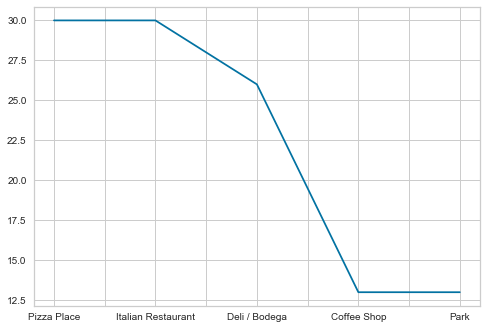

In [57]:
ny_mostcommon.plot()

In [58]:
boroughs_common = pd.DataFrame(ny_merged.groupby(['Borough','1st Most Common Venue']).size().reset_index(name='Frequency'))
boroughs_common

Borough            1st Most Common Venue  Frequency
0            Bronx                              Bar          1
1            Bronx                      Bus Station          6
2            Bronx               Chinese Restaurant          3
3            Bronx                    Deli / Bodega          6
4            Bronx                            Diner          1
5            Bronx                       Donut Shop          2
6            Bronx             Fast Food Restaurant          1
7            Bronx           Furniture / Home Store          1
8            Bronx                    Grocery Store          4
9            Bronx               Italian Restaurant          4
10           Bronx             Medical Supply Store          1
11           Bronx                Mobile Phone Shop          1
12           Bronx                             Park          3
13           Bronx                         Pharmacy          1
14           Bronx                      Pizza Place         11
15           Bronx                Recreation Center          1
16           Bronx                   Sandwich Place          2
17           Bronx                   Shipping Store          1
18           Bronx                      Supermarket          1
19           Bronx           Thrift / Vintage Store          1
20        Brooklyn                       Bagel Shop          1
21        Brooklyn                           Bakery          1
22        Brooklyn                             Bank          4
23        Brooklyn                              Bar          4
24        Brooklyn                   Baseball Field          1
25        Brooklyn                     Burger Joint          3
26        Brooklyn                             Café          2
27        Brooklyn             Cantonese Restaurant          1
28        Brooklyn             Caribbean Restaurant          2
29        Brooklyn               Child Care Service          1
30        Brooklyn               Chinese Restaurant          2
31        Brooklyn                      Coffee Shop          4
32        Brooklyn                     Dance Studio          1
33        Brooklyn                    Deli / Bodega          5
34        Brooklyn                   Discount Store          1
35        Brooklyn                       Donut Shop          2
36        Brooklyn                       Food Truck          1
37        Brooklyn              Fried Chicken Joint          3
38        Brooklyn                    Grocery Store          3
39        Brooklyn                  Harbor / Marina          1
40        Brooklyn                   Ice Cream Shop          2
41        Brooklyn               Italian Restaurant          4
42        Brooklyn        Latin American Restaurant          1
43        Brooklyn              Monument / Landmark          1
44        Brooklyn                             Park          3
45        Brooklyn                         Pharmacy          2
46        Brooklyn                      Pizza Place          7
47        Brooklyn                            Plaza          1
48        Brooklyn                             Pool          1
49        Brooklyn                       Restaurant          1
50        Brooklyn               Seafood Restaurant          1
51        Brooklyn                      Sports Club          1
52        Brooklyn                  Thai Restaurant          1
53        Brooklyn               Turkish Restaurant          1
54       Manhattan               African Restaurant          1
55       Manhattan              American Restaurant          1
56       Manhattan                              Bar          2
57       Manhattan                             Café          2
58       Manhattan               Chinese Restaurant          2
59       Manhattan                   Clothing Store          1
60       Manhattan                      Coffee Shop          6
61       Manhattan                    Deli / Bodega          1
62       Manhattan                   Disco

In [59]:
clusters_common = pd.DataFrame(ny_merged.groupby(['Cluster Labels', '1st Most Common Venue']).size().reset_index(name='Frequency'))
clusters_common

Cluster Labels            1st Most Common Venue  Frequency
0                 0               African Restaurant          1
1                 0              American Restaurant          2
2                 0              Arts & Crafts Store          1
3                 0                 Asian Restaurant          1
4                 0                       Bagel Shop          3
5                 0                           Bakery          2
6                 0                             Bank          4
7                 0                              Bar          3
8                 0                   Baseball Field          3
9                 0                            Beach          6
10                0                    Boat or Ferry          1
11                0                     Burger Joint          2
12                0                      Bus Station          9
13                0                         Bus Stop          6
14                0                             Café          4
15                0             Cantonese Restaurant          1
16                0             Caribbean Restaurant          5
17                0               Child Care Service          1
18                0               Chinese Restaurant         10
19                0                   Clothing Store          5
20                0                      Coffee Shop          7
21                0       Construction & Landscaping          1
22                0                Convenience Store          1
23                0                   Cosmetics Shop          1
24                0                     Dance Studio          3
25                0                    Deli / Bodega         17
26                0                   Discount Store          2
27                0                          Dog Run          1
28                0                       Donut Shop          5
29                0                       Eye Doctor          1
30                0                       Food Truck          1
31                0              Fried Chicken Joint          3
32                0           Furniture / Home Store          1
33                0                    Grocery Store          9
34                0             Gym / Fitness Center          1
35                0                  Harbor / Marina          1
36                0                            Hotel          3
37                0                Hotpot Restaurant          1
38                0                   Ice Cream Shop          2
39                0                Indian Restaurant          1
40                0               Italian Restaurant         20
41                0              Japanese Restaurant          2
42                0                    Jewelry Store          1
43                0                Korean Restaurant          4
44                0                           Lawyer          1
45                0                   Massage Studio          1
46                0             Medical Supply Store          1
47                0                    Metro Station          1
48                0        Middle Eastern Restaurant          1
49                0                Mobile Phone Shop          1
50                0              Monument / Landmark          1
51                0                  Other Nightlife          1
52                0                             Park          8
53                0              Peruvian Restaurant          1
54                0                         Pharmacy          5
55                0                             Pier          1
56                0                      Pizza Place         15
57                0                       Playground          3
58                0                            Plaza          2
59                0                             Pool          1
60                0                 Recording Studio          1
61                0                Re

In [60]:
boroughs_common.rename(columns={'1st Most Common Venue':'Venues'},inplace=True) 
boroughs_common = boroughs_common.sort_values(['Borough','Frequency'], ascending=False)
boroughs_top5 = boroughs_common.sort_values(['Borough','Frequency'], ascending=False).groupby('Borough').head(5)
boroughs_top5.head()

Borough              Venues  Frequency
135  Staten Island  Italian Restaurant          7
143  Staten Island         Pizza Place          7
121  Staten Island            Bus Stop          6
115  Staten Island          Bagel Shop          3
123  Staten Island      Clothing Store          3

In [61]:
# clusters_common.rename(columns={'1st Most Common Venue':'Venues'}, inplace=True)
clusters_top5 = clusters_common.sort_values(['Cluster Labels','Frequency'], ascending=False).groupby('Cluster Labels').head(5)
clusters_top5 = clusters_top5.reset_index(drop=True)
clusters_top5.head()

Cluster Labels 1st Most Common Venue  Frequency
0               4                  Bank          3
1               4                   Bar          2
2               4                 Diner          1
3               4         Grocery Store          1
4               4    Italian Restaurant          1

In [66]:
# nn_cluster = pd.DataFrame(ny_merged.groupby('Cluster Labels').count()['Neighborhood']).reset_index('Cluster Labels')
# nn_cluster['Neighborhood Ratio'] = nn_cluster['Neighborhood'] / nn_cluster['Neighborhood'].sum()
# nn_cluster['Neighborhood Ratio'] = pd.Series(["{0:.2f}%".format(val*100) for val in nn_cluster['Neighborhood Ratio']])
# nn_cluster['Venues'] = ny_merged.groupby('Cluster Labels').count()

nn_cluster

Cluster Labels  Neighborhood Neighborhood Ratio
0               0           220             71.90%
1               1            30              9.80%
2               2             8              2.61%
3               3            36             11.76%
4               4            12              3.92%

In [ ]:
print(nn_cluster['Neighborhood'].sum())

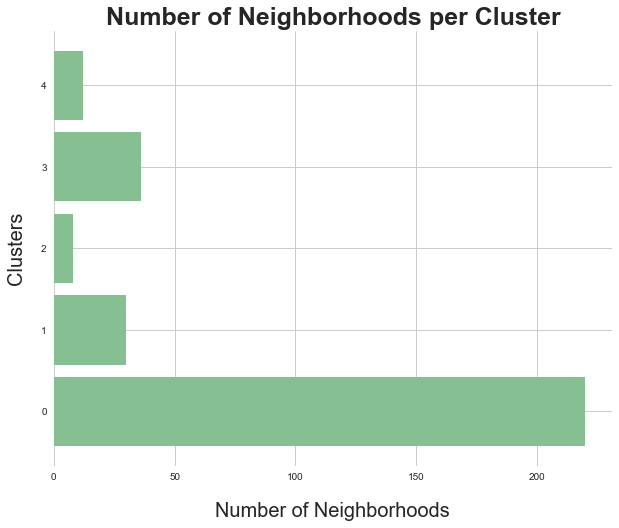

In [67]:
import matplotlib.pyplot as plt
neighborhoods = nn_cluster['Neighborhood']
clusters = nn_cluster['Cluster Labels']

fig, ax = plt.subplots(figsize=(10,8))
width = 0.85
ind = np.arange(len(neighborhoods))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax.barh(ind, neighborhoods, width, color='#86bf91')
ax.set_yticks(ind)
ax.set_yticklabels(clusters)
plt.title('Number of Neighborhoods per Cluster', fontsize = 25, weight = 'bold')
plt.xlabel('Number of Neighborhoods', fontsize = 20, labelpad=20)
plt.ylabel('Clusters', fontsize = 20, labelpad = 15)
plt.show()

#### As above graph shows, Clusters 0 compound almost 72% of 306 neighborhoods. 

In [68]:
nyvenuescount = ny_venues.groupby('Neighborhood').count()
nyvenuescount.head()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                          
Allerton                          30                      30     30   
Annadale                          11                      11     11   
Arden Heights                      5                       5      5   
Arlington                          6                       6      6   
Arrochar                          21                      21     21   

               Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                    
Allerton                   30               30              30  
Annadale                   11               11              11  
Arden Heights               5                5               5  
Arlington                   6                6               6  
Arrochar                   21               21              21

In [69]:
nyvenuescount = nyvenuescount.join(ny_merged.set_index('Neighborhood'), on=('Neighborhood'))
nyvenuescount = nyvenuescount.reset_index()
nyvenuescount = nyvenuescount[['Cluster Labels', 'Venue']]
nyvenuescount = nyvenuescount.rename(columns={'Venue':'Venues'})
nyvenuescount = nyvenuescount.groupby(['Cluster Labels'])['Venues'].sum().reset_index()
nyvenuescount

Cluster Labels  Venues
0               0    6242
1               1    1240
2               2     184
3               3    2292
4               4     463

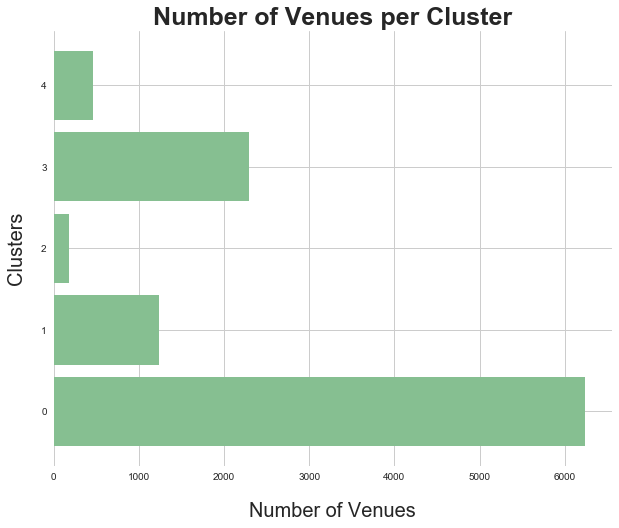

In [70]:
venues = nyvenuescount['Venues']
clusters = nyvenuescount['Cluster Labels']

fig, ax = plt.subplots(figsize=(10,8))
width = 0.85
ind = np.arange(len(venues))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax.barh(ind, venues, width, color='#86bf91')
ax.set_yticks(ind)
ax.set_yticklabels(clusters)
plt.title('Number of Venues per Cluster', fontsize = 25, weight = 'bold')
plt.xlabel('Number of Venues', fontsize = 20, labelpad=20)
plt.ylabel('Clusters', fontsize = 20, labelpad = 15)
plt.show()

In [71]:
nycnv = nn_cluster.join(nyvenuescount.set_index('Cluster Labels'), on=('Cluster Labels'))
nycnv.drop(['Neighborhood Ratio'], inplace=True, axis=1)
nycnv['Venue-Neighborhood Ratio'] = nycnv['Venues'] / nycnv['Neighborhood']
nycnv['Venue-Neighborhood Ratio'] = nycnv['Venue-Neighborhood Ratio'].round(decimals=0)

In [72]:
nycnv

Cluster Labels  Neighborhood  Venues  Venue-Neighborhood Ratio
0               0           220    6242                      28.0
1               1            30    1240                      41.0
2               2             8     184                      23.0
3               3            36    2292                      64.0
4               4            12     463                      39.0

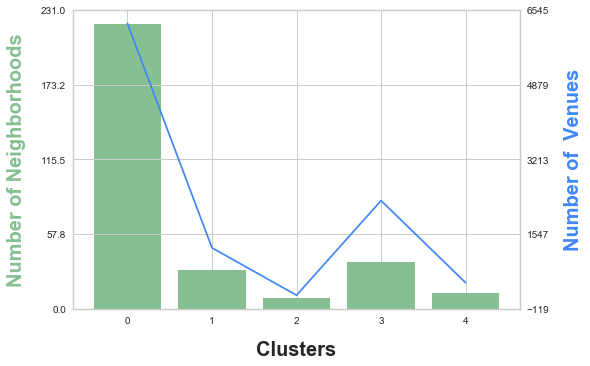

In [73]:
clusters = nycnv['Cluster Labels']
neighborhoods = nycnv['Neighborhood']
venues = nycnv['Venues']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(clusters, neighborhoods, color='#86bf91')
ax2.plot(clusters, venues, color='#4287f5')

ax1.set_yticks(np.linspace(*ax1.get_ybound(),5))
ax2.set_yticks(np.linspace(*ax2.get_ybound(),5))

ax1.set_xlabel('Clusters', fontsize=20 , labelpad=15, weight='bold')
ax1.set_ylabel('Number of Neighborhoods', color='#86bf91', fontsize=20 , labelpad=15, weight='bold')
ax2.set_ylabel('Number of  Venues', color='#4287f5', fontsize=20 , labelpad=15, weight='bold')
ax1.set_xticks(clusters)

plt.show()

In [74]:
df1 = ny_onehot.groupby('Neighborhood').sum().reset_index()
df1 = df1.join(newyork_n.set_index('Neighborhood'), on=('Neighborhood'))
df1.drop(columns=['Latitude', 'Longitude'],inplace=True)
df1 = df1.set_index('Borough')
df1.reset_index(inplace=True)
df1.loc['Total'] = df1.sum()
df1total = df1.loc[['Total']]
df1total.drop(columns=['Borough', 'Neighborhood'], inplace=True)
df1total = df1total.transpose()
df1total.reset_index(inplace=True)
df1total = df1total.rename(columns={'index':'Venue Category'})

In [75]:
df1total

Venue Category  Total
0                                 Yoga Studio     79
1                           Accessories Store     10
2                              Adult Boutique      1
3                           Afghan Restaurant      2
4                          African Restaurant      7
5                            Airport Terminal      1
6                         American Restaurant    171
7                                Antique Shop      6
8                                      Arcade      2
9                            Arepa Restaurant     10
10                     Argentinian Restaurant      9
11                                Art Gallery     52
12                                 Art Museum      5
13                        Arts & Crafts Store     21
14                       Arts & Entertainment      2
15                           Asian Restaurant     50
16                         Athletics & Sports     15
17                                 Auditorium      1
18                      Australian Restaurant      4
19                        Austrian Restaurant      2
20                                Auto Garage      1
21                            Automotive Shop      6
22                                  BBQ Joint     26
23                                 Baby Store      1
24                                 Bagel Shop    115
25                                     Bakery    232
26                                       Bank    149
27                                        Bar    235
28                             Baseball Field     20
29                           Baseball Stadium      3
30                           Basketball Court     10
31                                 Bath House      2
32                                      Beach     46
33                                  Beach Bar      1
34                                   Beer Bar     17
35                                Beer Garden     15
36                                 Beer Store      5
37                              Big Box Store      4
38                   Bike Rental / Bike Share      7
39                                  Bike Shop      3
40                                 Bike Trail      3
41                                     Bistro      6
42                                 Board Shop      8
43                              Boat or Ferry     14
44                                  Bookstore     49
45                                   Boutique     35
46                              Bowling Alley      8
47                                 Boxing Gym     16
48                       Brazilian Restaurant      5
49                             Breakfast Spot     42
50                                    Brewery     14
51                                Bridal Shop      4
52                                     Bridge      5
53                            Bubble Tea Shop     36
54                                     Buffet      4
55                                   Building      9
56                               Burger Joint     85
57                         Burmese Restaurant      1
58                              Burrito Place     11
59                                   Bus Line      4
60                                Bus Station     78
61                                   Bus Stop     69
62                           Business Service      5
63                                    Butcher      8
64                                  Cafeteria      2
65                                       Café    183
66                  Cajun / Creole Restaurant      9
67                               Camera Store      1
68                                 Campground      1
69                                Candy Store     14
70                       Cantonese Restaurant      5
71                       Caribbean Restaurant     79
72                       Caucasian Restaurant      1
73                      Check Cashing Service      3
74                                Cheese Shop      9
75 

In [77]:
df1['Total'] = df1.sum(axis=1)
df1bn = df1[['Borough','Neighborhood']]
df1bn = df1bn.drop(['Total'])
df1bn['Total'] = df1['Total']
df1bn

Borough               Neighborhood  Total
0            Bronx                   Allerton     30
1    Staten Island                   Annadale     11
2    Staten Island              Arden Heights      5
3    Staten Island                  Arlington      6
4    Staten Island                   Arrochar     21
5           Queens                    Arverne     20
6           Queens                    Astoria    100
7           Queens            Astoria Heights     13
8           Queens                 Auburndale     20
9         Brooklyn                 Bath Beach     46
10       Manhattan          Battery Park City     66
11        Brooklyn                  Bay Ridge     81
12          Queens                Bay Terrace     47
13   Staten Island                Bay Terrace     47
14           Bronx                 Baychester     20
15          Queens                    Bayside     71
16          Queens                  Bayswater      1
17           Bronx               Bedford Park     36
18        Brooklyn         Bedford Stuyvesant     28
19          Queens                 Beechhurst     16
20          Queens                   Bellaire     13
21          Queens               Belle Harbor     17
22          Queens                  Bellerose     19
23           Bronx                    Belmont     97
24        Brooklyn                Bensonhurst     36
25        Brooklyn               Bergen Beach      7
26          Queens                 Blissville     18
27   Staten Island                 Bloomfield      4
28        Brooklyn                Boerum Hill     90
29        Brooklyn               Borough Park     22
30          Queens               Breezy Point      5
31          Queens                  Briarwood     10
32        Brooklyn             Brighton Beach     41
33          Queens              Broad Channel      5
34        Brooklyn          Broadway Junction     20
35           Bronx                  Bronxdale     14
36        Brooklyn           Brooklyn Heights    100
37          Queens                 Brookville      2
38        Brooklyn                Brownsville     16
39   Staten Island                 Bulls Head     45
40        Brooklyn                   Bushwick     69
41   Staten Island               Butler Manor      4
42          Queens            Cambria Heights     11
43        Brooklyn                   Canarsie      6
44       Manhattan              Carnegie Hill     86
45        Brooklyn            Carroll Gardens    100
46           Bronx                Castle Hill      8
47   Staten Island          Castleton Corners     14
48       Manhattan             Central Harlem     45
49   Staten Island                 Charleston     27
50       Manhattan                    Chelsea    106
51   Staten Island                    Chelsea    106
52       Manhattan                  Chinatown    100
53           Bronx                City Island     29
54        Brooklyn                  City Line     33
55       Manhattan               Civic Center    100
56           Bronx          Claremont Village     19
57           Bronx               Clason Point     10
58   Staten Island                    Clifton     19
59       Manhattan                    Clinton    100
60        Brooklyn               Clinton Hill     92
61           Bronx                 Co-op City     16
62        Brooklyn                Cobble Hill     89
63          Queens              College Point     47
64   Staten Island                    Concord      7
65           Bronx                  Concourse     28
66           Bronx          Concourse Village     39
67        Brooklyn               Coney Island     17
68          Queens                     Corona     18
69           Bronx               Country Club      5
70        Brooklyn              Crown Heights     24
71        Brooklyn              Cypress Hills     23
72        Brooklyn                Ditmas Park     51
73   Staten Island               Dongan Hills     20
74          Queens                 D

In [80]:
df1bn[df1bn.duplicated('Neighborhood')]

Borough Neighborhood  Total
13   Staten Island  Bay Terrace     23
51   Staten Island      Chelsea     53
189         Queens  Murray Hill     73
268  Staten Island    Sunnyside     23

In [79]:
df1bn.loc[df1bn['Neighborhood'] == 'Bay Terrace', 'Total'] = 23
df1bn.loc[df1bn['Neighborhood'] == 'Chelsea', 'Total'] = 53
df1bn.loc[df1bn['Neighborhood'] == 'Murray Hill', 'Total'] = 73
df1bn.loc[df1bn['Neighborhood'] == 'Sunnyside', 'Total'] = 23

In [81]:
df1top = df1total.sort_values('Total',ascending=False).reset_index(drop=True).head()
df1top

Venue Category  Total
0         Pizza Place    452
1         Coffee Shop    328
2  Italian Restaurant    323
3       Deli / Bodega    273
4                 Bar    235

In [82]:
df1bottom = df1total.sort_values('Total').reset_index(drop=True).head()
df1bottom

Venue Category  Total
0         College Bookstore      1
1                 Locksmith      1
2      Caucasian Restaurant      1
3       Leather Goods Store      1
4  College Basketball Court      1

In [83]:
df1

Borough  \
0                                                  Bronx   
1                                          Staten Island   
2                                          Staten Island   
3                                          Staten Island   
4                                          Staten Island   
5                                                 Queens   
6                                                 Queens   
7                                                 Queens   
8                                                 Queens   
9                                               Brooklyn   
10                                             Manhattan   
11                                              Brooklyn   
12                                                Queens   
13                                         Staten Island   
14                                                 Bronx   
15                                                Queens   
16                                                Queens   
17                                                 Bronx   
18                                              Brooklyn   
19                                                Queens   
20                                                Queens   
21                                                Queens   
22                                                Queens   
23                                                 Bronx   
24                                              Brooklyn   
25                                              Brooklyn   
26                                                Queens   
27                                         Staten Island   
28                                              Brooklyn   
29                                              Brooklyn   
30                                                Queens   
31                                                Queens   
32                                              Brooklyn   
33                                                Queens   
34                                              Brooklyn   
35                                                 Bronx   
36                                              Brooklyn   
37                                                Queens   
38                                              Brooklyn   
39                                         Staten Island   
40                                              Brooklyn   
41                                         Staten Island   
42                                                Queens   
43                                              Brooklyn   
44                                             Manhattan   
45                                              Brooklyn   
46                                                 Bronx   
47                                         Staten Island   
48                                             Manhattan   
49                                         Staten Island   
50                                             Manhattan   
51                                         Staten Island   
52                                             Manhattan   
53                                                 Bronx   
54                                              Brooklyn   
55                                             Manhattan   
56                                                 Bronx   
57                                                 Bronx   
58                                         Staten Island   
59                                             Manhattan   
60                                              Brooklyn   
61                                                 Bronx   
62                                              Brooklyn   
63                                                Queens   
64                                         Staten Island   
65                                                 Bronx   
66                           

In [84]:
df1.to_excel('NY Neighborhoods and Venues.xlsx')

In [85]:
df5 = df1

In [86]:
df5 = df5.loc[:,['Borough', 'Total']]
df5.drop(['Total'], inplace=True)
df5.reset_index(inplace=True, drop=True)
df5

Borough  Total
0            Bronx     30
1    Staten Island     11
2    Staten Island      5
3    Staten Island      6
4    Staten Island     21
5           Queens     20
6           Queens    100
7           Queens     13
8           Queens     20
9         Brooklyn     46
10       Manhattan     66
11        Brooklyn     81
12          Queens     47
13   Staten Island     47
14           Bronx     20
15          Queens     71
16          Queens      1
17           Bronx     36
18        Brooklyn     28
19          Queens     16
20          Queens     13
21          Queens     17
22          Queens     19
23           Bronx     97
24        Brooklyn     36
25        Brooklyn      7
26          Queens     18
27   Staten Island      4
28        Brooklyn     90
29        Brooklyn     22
30          Queens      5
31          Queens     10
32        Brooklyn     41
33          Queens      5
34        Brooklyn     20
35           Bronx     14
36        Brooklyn    100
37          Queens      2
38        Brooklyn     16
39   Staten Island     45
40        Brooklyn     69
41   Staten Island      4
42          Queens     11
43        Brooklyn      6
44       Manhattan     86
45        Brooklyn    100
46           Bronx      8
47   Staten Island     14
48       Manhattan     45
49   Staten Island     27
50       Manhattan    106
51   Staten Island    106
52       Manhattan    100
53           Bronx     29
54        Brooklyn     33
55       Manhattan    100
56           Bronx     19
57           Bronx     10
58   Staten Island     19
59       Manhattan    100
60        Brooklyn     92
61           Bronx     16
62        Brooklyn     89
63          Queens     47
64   Staten Island      7
65           Bronx     28
66           Bronx     39
67        Brooklyn     17
68          Queens     18
69           Bronx      5
70        Brooklyn     24
71        Brooklyn     23
72        Brooklyn     51
73   Staten Island     20
74          Queens     26
75        Brooklyn    100
76        Brooklyn     65
77        Brooklyn      5
78          Queens     15
79        Brooklyn     12
80       Manhattan     40
81        Brooklyn     14
82           Bronx     16
83       Manhattan    100
84        Brooklyn     66
85           Bronx     23
86           Bronx      5
87          Queens     14
88           Bronx     19
89   Staten Island      4
90   Staten Island     12
91          Queens     35
92   Staten Island     37
93   Staten Island      3
94        Brooklyn     24
95          Queens     28
96           Bronx      3
97       Manhattan    100
98        Brooklyn     20
99       Manhattan    100
100       Brooklyn     19
101         Queens      7
102         Queens     62
103          Bronx     86
104         Queens     38
105         Queens     21
106       Brooklyn     65
107       Brooklyn     70
108  Staten Island      5
109         Queens     13
110       Brooklyn     61
111       Brooklyn     28
112       Brooklyn     17
113         Queens     20
114         Queens      5
115       Brooklyn     65
116      Manhattan     94
117  Staten Island      2
118  Staten Island     20
119  Staten Island     25
120       Brooklyn     27
121  Staten Island     20
122       Brooklyn    100
123  Staten Island      7
124      Manhattan    100
125  Staten Island      2
126      Manhattan     63
127         Queens     15
128  Staten Island      9
129          Bronx     26
130       Brooklyn     13
131         Queens     16
132         Queens     14
133         Queens      6
134       Brooklyn     37
135         Queens     37
136  Staten Island      1
137      Manhattan     62
138  Staten Island      9
139         Queens     70
140          Bronx     13
141      Manhattan     56
142         Queens     81
143         Queens     43
144         Queens      4
145         Queens     24
146       Brooklyn     36
147         Queens     48
148         Queens     17
149          Bronx     70
150          Bronx     33
151         Queens      5
152         Queens     21
153    

In [87]:
df5 = df5.groupby('Borough').sum().reset_index()

In [88]:
df5

Borough  Total
0          Bronx   1210
1       Brooklyn   2750
2      Manhattan   3255
3         Queens   2206
4  Staten Island    995

In [89]:
df5['Area (km2)'] = [110,180,59,280,152]
df5

Borough  Total  Area (km2)
0          Bronx   1210         110
1       Brooklyn   2750         180
2      Manhattan   3255          59
3         Queens   2206         280
4  Staten Island    995         152

In [92]:
df5['Venues Density (km2)'] = df5['Total'] / df5['Area (km2)']
df5

Borough  Total  Area (km2)  Venues Density (km2)
0          Bronx   1210         110             11.000000
1       Brooklyn   2750         180             15.277778
2      Manhattan   3255          59             55.169492
3         Queens   2206         280              7.878571
4  Staten Island    995         152              6.546053